**DeepONet using DeepXDE module**

In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Data loading

In [2]:
datastore = h5py.File("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/trials_many_alldata_new_eqution2.h5", 'r')
data_I = np.array(np.array(datastore["I"]))

data_c = np.array(np.array(datastore["c"]))
data_h = np.array(np.array(datastore["h"]))
t = np.linspace(0, 1, 601).reshape(601, 1)

Train-test split

In [3]:
train_label, test_label = train_test_split(range(len(data_I)), test_size=0.25, random_state=42)

data_i_train = data_I[train_label,:]
data_i_test = data_I[test_label,:]

data_c_train = data_c[train_label,:]
data_c_test = data_c[test_label,:]

data_h_train = data_h[train_label,:]
data_h_test = data_h[test_label,:]

In [4]:
# d_train = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_train.npz", allow_pickle=True)
# X_train = (d_train["X"][0].astype(np.float32), d_train["X"][1].astype(np.float32))
# y_train = d_train["y"].astype(np.float32)

In [5]:
X_train = (data_i_train.astype(np.float32), t.astype(np.float32))
y_train_c = data_c_train.astype(np.float32)

In [6]:
# d_test = np.load("C:/Users/arnab/OneDrive/Desktop/Study material/summer 24/Research/New equations/datasets/deepxde_deeponet_trial/deeponet_antiderivative_aligned/antiderivative_aligned_test.npz", allow_pickle=True)
# X_test = (d_test["X"][0].astype(np.float32), d_test["X"][1].astype(np.float32))
# y_test = d_test["y"].astype(np.float32)

In [7]:
X_test = (data_i_test.astype(np.float32), t.astype(np.float32))
y_test_c = data_c_test.astype(np.float32)

**Making the data compatible with deepxde.nn.pytorch.deeponet.PODDeepONet**

In [8]:
data_c = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train_c, X_test=X_test, y_test=y_test_c
)

**Counting the number of learnable parameters in the model**

In [9]:
m = 601
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 400, 400, 400, 400],
    [dim_x, 400, 400, 400, 400],
    "relu",
    "Glorot normal",
)

In [10]:
def compute_parameters(layers):
    params = 0
    for i in range(len(layers) - 1):
        params += layers[i] * layers[i + 1]  # Weights
        params += layers[i + 1]             # Biases
    return params

branch_layers = [m, 400, 400, 400, 400]
trunk_layers = [dim_x, 400, 400, 400, 400]

branch_params = compute_parameters(branch_layers)
trunk_params = compute_parameters(trunk_layers)
total_params = branch_params + trunk_params
print(f"Total trainable parameters: {total_params}, branch parameters: {branch_params}, trunk parameters: {trunk_params}")


Total trainable parameters: 1204000, branch parameters: 722000, trunk parameters: 482000


**Training the model**

In [11]:
model_c = dde.Model(data_c, net)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_c.compile("adam", lr=0.001)
losshistory_c, train_state_c = model_c.train(iterations=1000, display_every=100)

Compiling model...
'compile' took 2.582271 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.83e+01]    [1.81e+01]    []  
100       [2.36e+00]    [2.32e+00]    []  
200       [1.21e+00]    [1.19e+00]    []  
300       [6.53e-01]    [6.47e-01]    []  
400       [5.61e-01]    [5.57e-01]    []  
500       [5.28e-01]    [5.17e-01]    []  
600       [3.11e-01]    [3.04e-01]    []  
700       [2.83e-01]    [2.79e-01]    []  
800       [2.07e-01]    [2.03e-01]    []  
900       [2.03e-01]    [2.00e-01]    []  
1000      [1.65e-01]    [1.62e-01]    []  

Best model at step 1000:
  train loss: 1.65e-01
  test loss: 1.62e-01
  test metric: []

'train' took 1967.420213 s



In [12]:
y_train_h = data_h_train.astype(np.float32)
y_test_h = data_h_test.astype(np.float32)

In [13]:
data_h = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train_h, X_test=X_test, y_test=y_test_h
)

In [14]:
m = 601
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 400, 400, 400, 400],
    [dim_x, 400, 400, 400, 400],
    "relu",
    "Glorot normal",
)

In [15]:
branch_layers = [m, 400, 400, 400, 400]
trunk_layers = [dim_x, 400, 400, 400, 400],

branch_params = compute_parameters(branch_layers)
trunk_params = compute_parameters(trunk_layers)
total_params = branch_params + trunk_params
print(f"Total trainable parameters: {total_params}, branch parameters: {branch_params}, trunk parameters: {trunk_params}")


Total trainable parameters: 722000, branch parameters: 722000, trunk parameters: 0


In [16]:
model_h = dde.Model(data_h, net)
# lr = ReduceLROnPlateau(optimizer_combined, mode='min', factor=0.5, patience=5)
model_h.compile("adam", lr=0.01)
losshistory_h, train_state_h = model_h.train(iterations=1000, display_every=100)

Compiling model...
'compile' took 0.003206 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.59e-01]    [1.61e-01]    []  
100       [3.65e-02]    [3.66e-02]    []  
200       [2.85e-02]    [2.87e-02]    []  
300       [2.09e-02]    [2.12e-02]    []  
400       [1.93e-02]    [1.96e-02]    []  
500       [1.78e-02]    [1.80e-02]    []  
600       [1.87e-02]    [1.90e-02]    []  
700       [1.55e-02]    [1.58e-02]    []  
800       [1.38e-02]    [1.40e-02]    []  
900       [1.57e-02]    [1.61e-02]    []  
1000      [1.16e-02]    [1.17e-02]    []  

Best model at step 1000:
  train loss: 1.16e-02
  test loss: 1.17e-02
  test metric: []

'train' took 2041.452214 s



In [17]:
len(data_h_test)

27886

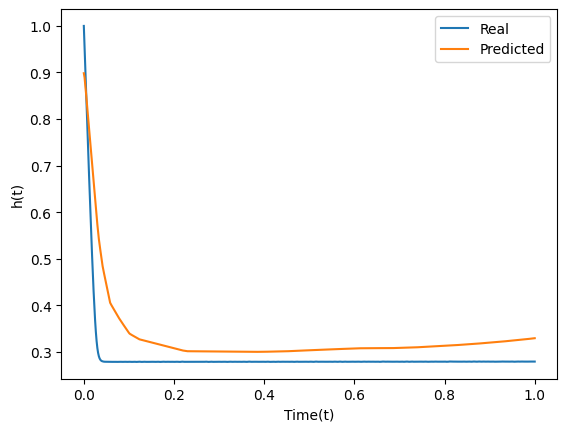

In [20]:
n = np.random.randint(0, len(data_h_test))
pred_h = model_h.predict((data_i_test[n].reshape(1, -1), t))
plt.figure()
plt.plot(t, data_h_test[n], label="Real")
plt.plot(t, pred_h.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("h(t)")
plt.legend()
plt.show()

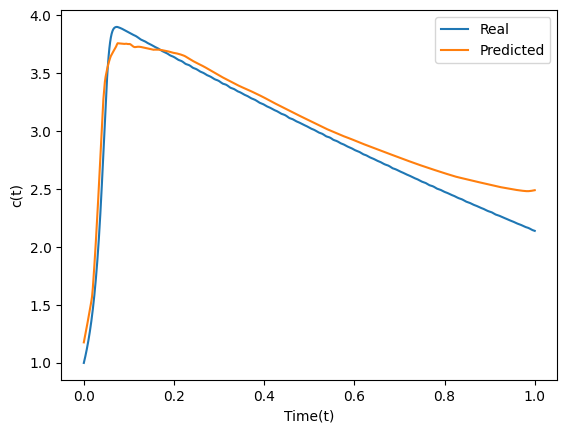

In [21]:
n = np.random.randint(0, len(data_h_test))
pred_c = model_c.predict((data_i_test[n].reshape(1, -1), t))
plt.figure()
plt.plot(t, data_c_test[n], label="Real")
plt.plot(t, pred_c.T, label="Predicted")
plt.xlabel("Time(t)")
plt.ylabel("c(t)")
plt.legend()
plt.show()